##### EDA

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data= pd.read_csv('proses_pml.csv')
data.head()

,Movie Name,Genre,Country,Release Date,Percentage User score,Description,Reviewer,Score,Reviews,Movie link
0,Diary of a Wimpy Kid: Rodrick Rules,"['Family', 'Comedy']",US,3/25/2011,67,"Wimpy Greg Heffley, now in seventh grade, thin...",No reviewer,0,No review available,https://www.themoviedb.org/movie/60307-diary-o...
1,Diary of a Wimpy Kid: Rodrick Rules,"['Animation', 'Comedy', 'Family']",US,12/2/2022,69,"A new school year, his brother Rodrick teases ...",r96sk,60,"They just keep making these, eh? Not good when...",https://www.themoviedb.org/movie/897192-diary-...
2,Cinderella Man,"['Romance', 'Drama', 'History']",US,6/2/2005,76,"The true story of boxer Jim Braddock who, foll...",Andres Gomez,70,The stereotypical sports movie about a charact...,https://www.themoviedb.org/movie/921-cinderell...
3,Cinderella Man,"['Romance', 'Drama', 'History']",US,6/2/2005,76,"The true story of boxer Jim Braddock who, foll...",Peter McGinn,70,"This is a fine boxing movie, one that relies m...",https://www.themoviedb.org/movie/921-cinderell...
4,Package Deal,['Drama'],PH,8/9/2024,50,Aa story about a newlywed that receive a surpr...,No reviewer,0,No review available,https://www.themoviedb.org/movie/1312863-packa...


In [ ]:
data.describe()

,Percentage User score,Score
count,19183.000000,19183.000000
mean,65.182714,44.518845
std,13.882689,35.397639
min,0.000000,0.000000
25%,61.000000,0.000000
50%,67.000000,60.000000
75%,73.000000,70.000000
max,100.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19183 entries, 0 to 19182
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Movie Name             19183 non-null  object
 1   Genre                  19183 non-null  object
 2   Country                19183 non-null  object
 3   Release Date           19183 non-null  object
 4   Percentage User score  19183 non-null  int64 
 5   Description            19183 non-null  object
 6   Reviewer               19183 non-null  object
 7   Score                  19183 non-null  int64 
 8   Reviews                19183 non-null  object
 9   Movie link             19183 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


In [ ]:
# Mengubah tipe data yang sesuai
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
data['Percentage User score'] = data['Percentage User score'].astype(float)
data['Score'] = data['Score'].astype(float)

# Membersihkan string dari spasi ekstra
data['Genre'] = data['Genre'].str.strip()
data['Country'] = data['Country'].str.strip()
data['Description'] = data['Description'].str.strip()
data['Reviews'] = data['Reviews'].str.strip()
data['Movie link'] = data['Movie link'].str.strip()
data['Reviewer'] = data['Reviewer'].str.strip()

In [ ]:
unique_count = data['Movie Name'].nunique()
print("Number of unique movies:", unique_count)
unique_count = data['Reviewer'].nunique()
print("Number of unique reviewer:", unique_count)

Number of unique movies: 9654
Number of unique reviewer: 1409


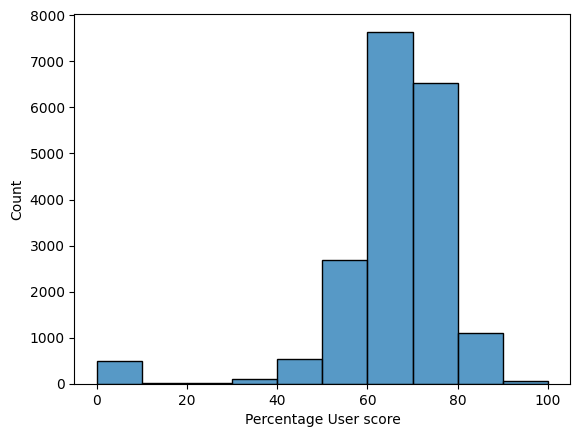

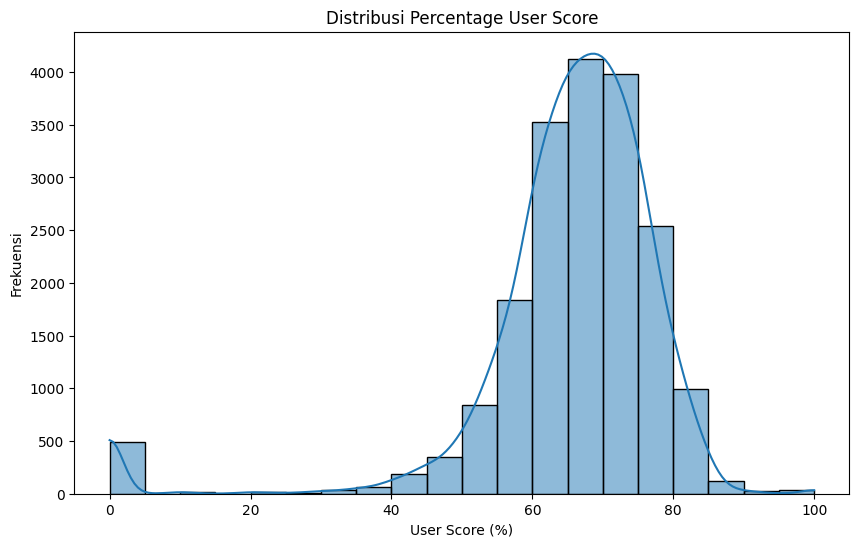

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data,x='Percentage User score',bins=10)
plt.show()
data['Percentage User score'].value_counts()

# Visualisasi distribusi Percentage User Score
plt.figure(figsize=(10, 6))
# Changed 'Percentage User Score' to 'Percentage User score' to match the column name in the DataFrame.
sns.histplot(data['Percentage User score'], bins=20, kde=True)
plt.title('Distribusi Percentage User Score')
plt.xlabel('User Score (%)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
data['Genre'].value_counts()

,count
Genre,
['Drama'],942
"['Horror', 'Thriller']",557
['Horror'],466
['Comedy'],451
"['Drama', 'Romance']",392
...,...
"['Animation', 'Action', 'Fantasy', 'Family']",1
"['Action', 'Adventure', 'Animation', 'Science Fiction', 'Thriller']",1
"['TV Movie', 'Drama', 'Thriller']",1


In [ ]:
# Rata-rata rating per genre
average_rating_by_genre = data.groupby('Genre')['Score'].mean()

# Urutkan berdasarkan rating rata-rata secara descending (tertinggi ke terendah)
sorted_ratings = average_rating_by_genre.sort_values(ascending=False)

# Cetak genre dengan rating tertinggi
print("Rata-rata rating per genre (tertinggi ke terendah):")
print(sorted_ratings)

# Jika hanya ingin genre dengan rata-rata tertinggi saja
top_genre = sorted_ratings.index[0]
top_rating = sorted_ratings.iloc[0]
print(f"\nGenre dengan rata-rata rating tertinggi adalah '{top_genre}' dengan rating {top_rating:.2f}.")



Rata-rata rating per genre (tertinggi ke terendah):
Genre
['Animation', 'Adventure', 'Family', 'Fantasy', 'Comedy', 'Action']    100.0
['Crime', 'Action', 'Drama', 'Thriller']                               100.0
['Comedy', 'Family', 'Animation', 'Adventure', 'Mystery']              100.0
['Drama', 'Adventure', 'Action', 'History']                            100.0
['Animation', 'Comedy', 'Adventure', 'Drama', 'Family']                100.0
                                                                       ...  
['Animation', 'Adventure', 'Drama', 'Family', 'Fantasy']                 0.0
['Horror', 'Comedy', 'Drama']                                            0.0
['Comedy', 'Animation', 'Adventure', 'Family']                           0.0
['Horror', 'Comedy', 'Mystery']                                          0.0
['Drama', 'Action', 'Crime', 'Horror']                                   0.0
Name: Score, Length: 2273, dtype: float64

Genre dengan rata-rata rating tertinggi adalah '['An

In [ ]:
print(data.groupby('Genre')['Score'].mean().max())

100.0


##modeling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

data = pd.read_csv('/content/proses_pml.csv')

# TF-IDF Vectorization pada kolom 'Genre'
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Genre'])

# Hitung Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat fungsi rekomendasi berbasis konten
indices = pd.Series(data.index, index=data['Movie Name']).drop_duplicates()

def content_based_recommendations(user_id=None):
    if user_id:  # Jika ID pengguna dimasukkan
        # Ambil semua film yang direview oleh pengguna
        watched_movies = data[data['Reviewer'] == user_id]['Movie Name'].tolist()
        if not watched_movies:
            return f"Pengguna dengan ID '{user_id}' tidak memiliki review dalam database."

        # Ambil indeks film yang direview
        watched_indices = indices[watched_movies].values
        # Hitung skor kesamaan untuk semua film yang direview
        sim_scores = sum([cosine_sim[i] for i in watched_indices])
    else:  # Jika tidak ada ID pengguna, gunakan film pertama sebagai referensi
        sim_scores = cosine_sim[0]

    # Urutkan skor kesamaan dan ambil 3 teratas
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:4]]  # Ambil rekomendasi teratas

    return data['Movie Name'].iloc[movie_indices]

# Input pengguna: ID pengguna
user_id_input = input("Masukkan ID / Username: ").strip()

if user_id_input:
    print(f"ID / Username: {user_id_input} diterima. Menyesuaikan rekomendasi...")
    recommendations = content_based_recommendations(user_id=user_id_input)
else:
    recommendations = content_based_recommendations()

print("Rekomendasi:")
print(recommendations)

# Evaluasi model: Menghitung Mean Cosine Similarity
def evaluate_model():
    """
    Fungsi untuk mengevaluasi model dengan menghitung mean cosine similarity
    dari semua rekomendasi yang diberikan.
    """
    similarities = []
    for idx in range(len(data)):
        # Cosine similarity untuk tiap item
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_similarities = [x[1] for x in sim_scores[1:4]]
        similarities.extend(top_similarities)
    mean_similarity = sum(similarities) / len(similarities)
    return mean_similarity

# Hitung evaluasi model
mean_similarity = evaluate_model()
print(f"Mean Cosine Similarity untuk rekomendasi: {mean_similarity:.4f}")

Masukkan ID / Username: JPV852
ID / Username: JPV852 diterima. Menyesuaikan rekomendasi...
Rekomendasi:
13579    Extinction
11119     Peninsula
18032    Shark Bait
Name: Movie Name, dtype: object
Mean Cosine Similarity untuk rekomendasi: 0.9940


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357276 sha256=0f0925374dd6ebe975d9d79bba9a569c36bda4d3adccf642fe2d8b4a706078f3
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import PredictionImpossible

# Dataset untuk Surprise
reader = Reader(rating_scale=(0, 100))  # Sesuaikan skala rating
collab_data = Dataset.load_from_df(data[['Reviewer', 'Movie Name', 'Score']], reader)

# Model SVD (Singular Value Decomposition)
svd_model = SVD()
cross_validate(svd_model, collab_data, cv=5, verbose=True)

# Latih model
trainset = collab_data.build_full_trainset()
svd_model.fit(trainset)

# Fungsi Collaborative Recommendations
def collaborative_recommendations(user_id, n_recommendations=3):
    movies = data['Movie Name'].unique()
    watched_movies = data[data['Reviewer'] == user_id]['Movie Name']
    to_predict = [movie for movie in movies if movie not in watched_movies.values]
    predictions = []
    for movie in to_predict:
        try:
            predictions.append((movie, svd_model.predict(user_id, movie).est))
        except PredictionImpossible:
            continue
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    return [pred[0] for pred in predictions[:n_recommendations]]

# Input pengguna
user_id = input("Masukkan ID / Username: ").strip()
recommendations = collaborative_recommendations(user_id)

# Output
if not recommendations:
    print(f"Tidak ada rekomendasi untuk user '{user_id}'.")
else:
    print(f"Rekomendasi untuk '{user_id}':")
    for i, movie in enumerate(recommendations, 1):
        print(f"{i}. {movie}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    19.4999 19.3889 19.0137 19.1788 18.8168 19.1796 0.2472  
MAE (testset)     12.7357 12.6741 12.5178 12.6979 12.2379 12.5727 0.1831  
Fit time          0.32    0.37    0.31    0.49    0.65    0.43    0.13    
Test time         0.02    0.03    0.02    0.04    0.04    0.03    0.01    
Masukkan ID / Username: JPV852
Rekomendasi untuk 'JPV852':
1. Portrait of a Lady on Fire
2. Top Gun: Maverick
3. Jurassic Park


In [ ]:
def hybrid_with_sentiment(user_id, n_recommendations=5):
    """
    Fungsi untuk menghasilkan rekomendasi hybrid berdasarkan konten dan kolaboratif,
    kemudian diurutkan berdasarkan skor sentimen.
    """
    # Rekomendasi berbasis konten
    content_recs = content_based_recommendations()
    if isinstance(content_recs, str):  # Jika terjadi error, kosongkan rekomendasi konten
        content_recs = []

    # Rekomendasi berbasis kolaboratif
    collab_recs = collaborative_recommendations(user_id)

    # Gabungkan rekomendasi dan urutkan berdasarkan Sentiment Score
    combined_recs = list(set(content_recs).union(set(collab_recs)))
    sentiment_sorted = sorted(
        combined_recs,
        key=lambda x: data.loc[data['Movie Name'] == x, 'Sentiment Score'].mean(),
        reverse=True
    )
    return sentiment_sorted[:n_recommendations]


def evaluate_hybrid():
    """
    Fungsi untuk mengevaluasi cakupan rekomendasi hybrid.
    Coverage dihitung sebagai persentase film yang direkomendasikan
    terhadap total film dalam dataset.
    """
    total_movies = len(data['Movie Name'].unique())
    recommended_movies = set(hybrid_with_sentiment(user_id_input))
    coverage = len(recommended_movies) / total_movies * 100
    return coverage


# Input pengguna
user_id_input = input("Masukkan ID pengguna: ").strip()

# Hybrid Recommendations
hybrid_recs = hybrid_with_sentiment(user_id_input)

# Menampilkan rekomendasi hybrid
if not hybrid_recs:
    print(f"Tidak ada rekomendasi untuk user '{user_id_input}'.")
else:
    print(f"\nRekomendasi Hybrid untuk user '{user_id_input}':")
    for idx, movie in enumerate(hybrid_recs, 1):
        print(f"{idx}. {movie}")

# Evaluasi cakupan rekomendasi
coverage = evaluate_hybrid()
print(f"\nCoverage of Hybrid Recommendations: {coverage:.2f}%")


Masukkan ID pengguna: JPV852

Rekomendasi Hybrid untuk user 'JPV852':
1. Yes Day
2. The Lighthouse
3. Battle: Los Angeles
4. Guardians of the Galaxy
5. Padre no hay mas que uno 3

Coverage of Hybrid Recommendations: 0.05%
